In [1]:
from pyquasar import *

LICENSE sulum slmlp 4.3 30-jun-2015 uncounted hostid=ANY _ck=c51efc8e94 sig="60PG453MNM3XG74U4RVJ2X1W5F32PWNPBSA5EXR22M09V6F1PVQBYHEGN05T97EDC1042ACHHH4G"


In [2]:

model = DecisionProblem("Production").maximize()
process = UnivariateGBM(
    "Demand", 25, 0, 1, 
)


initInventory = 20
numStages = 20
for t in range(numStages):
    inventory, produce, sell = model.add_variables(
        t, "inventory", "produce", "sell")

    #objective function
    model += 5*sell - 3*produce - 0.5*inventory

    #inventory balance
    model += inventory == (oldInventory if t > 0 else initInventory) - sell + produce

    #bounds
    model += sell <= rand("Demand")
    model += sell <= inventory
    model += produce <= 20
    oldInventory = inventory

lat = Lattice(process, numStages, sample_size=1000)
opt = DynamicOptimizer(model, lat, linear_solver='clp')
opt.solve()
opt.join()
sim = opt.policy.simulate()

In [4]:
sim.head()

rewards decision                   shadow_price  state
             rewards     sell inventory produce    inventory Demand
series stage                                                       
0      0       30.00    20.00     20.00   20.00         3.23  25.00
       1       33.49    17.67     17.67   15.35         2.63  17.67
       2       -1.06     1.41     16.26    0.00        -0.17   1.41
       3       21.59    18.13     18.13   20.00         3.27  18.61
       4       25.79    19.07     19.07   20.00         3.76  33.50

In [16]:
proc = MarkovProcess.from_df(sim.state)

In [17]:
opt = DynamicOptimizer(model, proc)
opt.solve()
opt.join()
sim2 = opt.policy.simulate()

In [35]:
print proc._inner.getCSV()

sample,stage,Demand
0,0,25.0
0,1,63.497130045046895
0,2,68.85032966225502
0,3,9.444489219478227
0,4,15.291798010096256
0,5,139.9070819654637
0,6,63.4520119334294
0,7,50.73722583802093
0,8,45.01509866070776
0,9,28.187592992826218
0,10,16.781365224365757
0,11,52.85711514583512
0,12,85.24159472741992
0,13,37.92997670819216
0,14,57.45053141905436
0,15,24.30776001282453
0,16,62.98116948743947
0,17,18.225009042712703
0,18,26.001034292744365
0,19,71.79393934051508
1,0,25.0
1,1,59.80513918467615
1,2,4.909461223387488
1,3,2.717923815738148
1,4,2.4364288543616457
1,5,8.45344359918333
1,6,4.478095577383247
1,7,11.938179353176984
1,8,13.508754351292353
1,9,28.187592992826218
1,10,220.47067085136
1,11,479.58238881390196
1,12,193.57666246110585
1,13,1712.7638450725033
1,14,57.45053141905436
1,15,24.30776001282453
1,16,62.98116948743947
1,17,18.225009042712703
1,18,26.001034292744365
1,19,71.79393934051508
2,0,25.0
2,1,18.998393416098878
2,2,33.921723733254424
2,3,38.83522120116199
2,4,101.3999024559

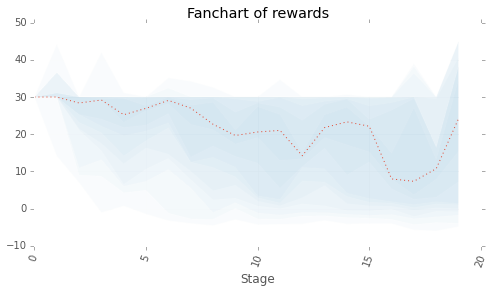

In [5]:
sim = opt.policy.simulate(100)
sim.rewards.fanchart()

In [12]:
QuasarDataFrame.from_csv('price_sample_13-14.csv')

s0   s1   s2  price_0  price_1  price_2  price_3  price_4  \
series stage                                                               
0      0     0.00 0.00 0.00    93.75    66.92    65.30    65.75    66.61   
       1     0.00 0.00 0.00    78.10    68.10    66.10    66.40    67.44   
       2     0.00 0.00 0.00    84.00    67.86    66.08    66.30    67.34   
       3     0.00 0.00 0.00    82.08    68.00    66.38    66.58    67.57   
       4     0.00 0.00 0.00    80.55    67.17    66.00    66.05    67.00   
       5     0.00 0.00 0.00    73.28    67.83    66.73    66.78    67.66   
       6     0.00 0.00 0.00    72.67    67.94    66.84    66.94    67.67   
       7     0.00 0.00 0.00    69.65    68.07    67.05    67.15    67.85   
       8     0.00 0.00 0.00    69.92    68.14    67.01    66.86    67.50   
       9     0.00 0.00 0.00    67.67    68.32    67.17    67.10    67.65   
       10    0.00 0.00 0.00    67.75    68.22    67.17    66.90    67.56   
       11    0.00 0.00 0.00    67.38    67.54    66.47    66.04    66.80   
       12    0.00 0.00 0.00    66.67    66.97    66.11    65.66    66.45   
       13    0.00 0.00 0.00    66.67    66.82    66.31    65.77    66.54   
       14    0.00 0.00 0.00    66.80    65.78    65.52    65.22    65.72   
       15    0.00 0.00 0.00    64.65    65.37    65.00    64.85    65.50   
       16    0.00 0.00 0.00    64.17    65.47    65.04    64.99    65.65   
       17    0.00 0.00 0.00    65.50    65.52    65.12    64.94    65.65   
       18    0.00 0.00 0.00    65.70    64.72    64.12    64.23    64.84   
       19    0.00 0.00 0.00    65.50    65.32    64.52    64.92    65.44   
       20    0.00 0.00 0.00    66.00    65.32    63.93    64.23    65.03   
       21    0.00 0.00 0.00    64.88    63.90    64.26    65.06    64.71   
       22    0.00 0.00 0.00    65.42    63.46    63.91    64.71    64.27   
       23    0.00 0.00 0.00    64.15    64.03    64.52    65.29    64.91   
       24    0.00 0.00 0.00    64.28    64.03    64.52    65.29    64.91   
       25    0.00 0.00 0.00    64.15    64.58    64.88    65.73    65.43   
       26    0.00 0.00 0.00    64.75    64.15    64.44    65.53    65.22   
       27    0.00 0.00 0.00    64.21    63.79    64.10    65.25    65.00   
       28    0.00 0.00 0.00    63.75    63.21    63.44    64.67    64.40   
       29    0.00 0.00 0.00    64.08    63.47    63.69    64.80    64.60   
...           ...  ...  ...      ...      ...      ...      ...      ...   
       227   0.00 0.00 0.00    58.73    58.79    58.35    58.10    57.34   
       228   0.00 0.00 0.00    58.58    59.25    58.93    58.65    57.89   
       229   0.00 0.00 0.00    58.65    58.48    58.24    58.00    57.24   
       230   0.00 0.00 0.00    58.25    58.45    58.35    57.95    57.20   
       231   0.00 0.00 0.00    58.00    58.04    57.99    57.52    56.78   
       232   0.00 0.00 0.00    57.12    56.64    56.64    56.36    55.71   
       233   0.00 0.00 0.00    56.26    56.46    56.39    56.07    55.39   
       234   0.00 0.00 0.00    56.00    56.03    55.99    55.69    55.08   
       235   0.00 0.00 0.00    56.21    56.95    56.95    56.65    55.95   
       236   0.00 0.00 0.00    57.15    56.95    56.15    55.85    55.28   
       237   0.00 0.00 0.00    56.58    61.70    61.29    60.80    61.04   
       238   0.00 0.00 0.00    60.90    58.10    57.83    57.18    57.55   
       239   0.00 0.00 0.00    58.17    57.60    57.36    56.73    57.18   
       240   0.00 0.00 0.00    57.38    58.60    58.28    57.67    58.17   
       241   0.00 0.00 0.00    58.48    59.64    59.26    58.68    59.14   
       242   0.00 0.00 0.00    58.50    58.23    57.90    57.34    57.78   
       243   0.00 0.00 0.00    58.35    57.61    57.29    56.74    57.24   
       244   0.00 0.00 0.00    57.75    58.18    57.92    57.36    57.90   
       245   0.00 0.00 0.00    58.26    58.61    58.21    57.65    58.13   
       246   0.00 0.00 0.00    58.26    59.02    58.67    58.07